<a href="https://colab.research.google.com/github/sandesh8055/bms-scada-anomaly-failure-risk-ml/blob/main/bms_scada_anomaly_failure_risk_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BMS / SCADA Energy Anomaly & Failure Risk Detection

## Problem Statement
Large buildings and infrastructure facilities rely on Building Management
Systems (BMS) and SCADA platforms to monitor and control equipment such as
HVAC systems, chillers, pumps, and electrical systems.

Abnormal behavior in these systems can lead to:
- Energy waste
- Reduced equipment life
- Comfort and safety issues
- Unexpected failures

This project aims to:
1. Detect abnormal energy consumption patterns
2. Predict the risk of equipment failure

The goal is to demonstrate how machine learning can support
early warning and preventive maintenance in BMS / SCADA environments.

Data Design :
Generate Synthetic BMS / SCADA Data

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

n_samples = 1800

data = pd.DataFrame({
    "equipment_type": np.random.choice(
        ["Chiller", "AHU", "Pump"], n_samples, p=[0.35, 0.4, 0.25]
    ),
    "avg_temperature_c": np.random.uniform(18, 35, n_samples),
    "power_consumption_kw": np.random.uniform(5, 120, n_samples),
    "runtime_hours_per_day": np.random.uniform(4, 24, n_samples),
    "load_percentage": np.random.uniform(20, 100, n_samples),
    "alarm_count": np.random.poisson(1.5, n_samples),
    "days_since_last_maintenance": np.random.randint(1, 365, n_samples)
})

Create Anomaly & Failure Risk Logic

In [2]:
anomaly_score = (
    (data["avg_temperature_c"] > 28).astype(int) * 0.4 +
    (data["power_consumption_kw"] / 120) * 0.3 +
    (data["runtime_hours_per_day"] / 24) * 0.2 +
    (data["load_percentage"] / 100) * 0.3 +
    (data["alarm_count"] > 2).astype(int) * 0.4 +
    (data["days_since_last_maintenance"] / 365) * 0.4
)

data["anomaly_detected"] = (anomaly_score > 1.2).astype(int)

Create Failure Risk Score (Impact)

In [3]:
data["failure_risk_score"] = (
    anomaly_score * np.random.uniform(0.7, 1.3, n_samples)
).clip(0, 3)

In [4]:
data.head()

,equipment_type,avg_temperature_c,power_consumption_kw,runtime_hours_per_day,load_percentage,alarm_count,days_since_last_maintenance,anomaly_detected,failure_risk_score
0,AHU,34.260524,21.240707,8.879906,49.521419,3,194,1,1.350139
1,Pump,30.537642,70.650903,23.334685,30.841350,1,110,0,0.951445
2,AHU,24.005274,26.306091,23.162762,61.471970,1,66,0,0.600549
3,AHU,23.041105,37.043952,8.952633,29.008738,2,254,0,0.609235
4,Chiller,23.944955,30.151627,10.961039,94.718993,1,283,0,0.778432


Save the dataset

In [5]:
data.to_csv("synthetic_bms_scada_data.csv", index=False)

Exploratory Data Analysis (EDA):

Load the data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("synthetic_bms_scada_data.csv")
data.head()

,equipment_type,avg_temperature_c,power_consumption_kw,runtime_hours_per_day,load_percentage,alarm_count,days_since_last_maintenance,anomaly_detected,failure_risk_score
0,AHU,34.260524,21.240707,8.879906,49.521419,3,194,1,1.350139
1,Pump,30.537642,70.650903,23.334685,30.841350,1,110,0,0.951445
2,AHU,24.005274,26.306091,23.162762,61.471970,1,66,0,0.600549
3,AHU,23.041105,37.043952,8.952633,29.008738,2,254,0,0.609235
4,Chiller,23.944955,30.151627,10.961039,94.718993,1,283,0,0.778432


Basic data sanity check

In [7]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   equipment_type               1800 non-null   object 
 1   avg_temperature_c            1800 non-null   float64
 2   power_consumption_kw         1800 non-null   float64
 3   runtime_hours_per_day        1800 non-null   float64
 4   load_percentage              1800 non-null   float64
 5   alarm_count                  1800 non-null   int64  
 6   days_since_last_maintenance  1800 non-null   int64  
 7   anomaly_detected             1800 non-null   int64  
 8   failure_risk_score           1800 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 126.7+ KB


,avg_temperature_c,power_consumption_kw,runtime_hours_per_day,load_percentage,alarm_count,days_since_last_maintenance,anomaly_detected,failure_risk_score
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,26.512505,61.626974,13.932650,58.561695,1.502222,183.545556,0.149444,0.892101
std,4.884758,33.056377,5.784550,22.706489,1.217802,102.024821,0.356625,0.340111
min,18.000198,5.003533,4.004820,20.019435,0.000000,1.000000,0.000000,0.169427
25%,22.397712,33.342420,8.867539,39.097753,1.000000,97.000000,0.000000,0.636066
50%,26.593193,60.575266,13.836660,57.865925,1.000000,182.000000,0.000000,0.854168
75%,30.727739,90.202259,19.071203,76.850555,2.000000,271.000000,0.000000,1.120180
max,34.981174,119.949136,23.989214,99.912376,7.000000,364.000000,1.000000,2.224258


The dataset represents simulated BMS/SCADA operational data
covering thermal, electrical, and maintenance-related signals.
No missing values are present, allowing consistent analysis.

How frequent are anomalies?

In [8]:
data["anomaly_detected"].value_counts(normalize=True)

,proportion
anomaly_detected,
0,0.850556
1,0.149444


Detected anomalies represent a minority of observations,
reflecting real-world conditions where abnormal behavior
is infrequent but operationally significant.

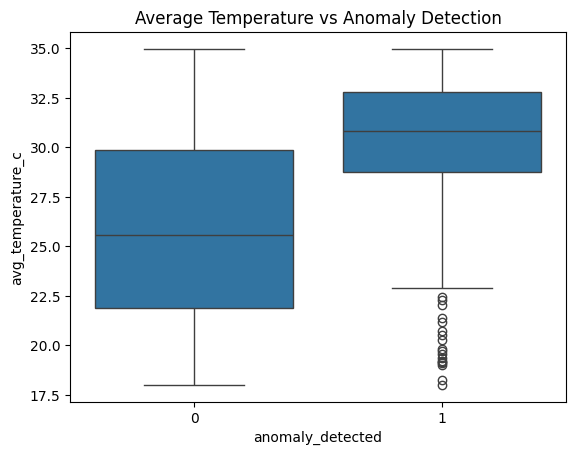

In [9]:
sns.boxplot(
    x="anomaly_detected",
    y="avg_temperature_c",
    data=data
)
plt.title("Average Temperature vs Anomaly Detection")
plt.show()

Higher operating temperatures are associated with
a greater likelihood of anomalous system behavior.

Power consumption vs anomaly (energy waste signal)

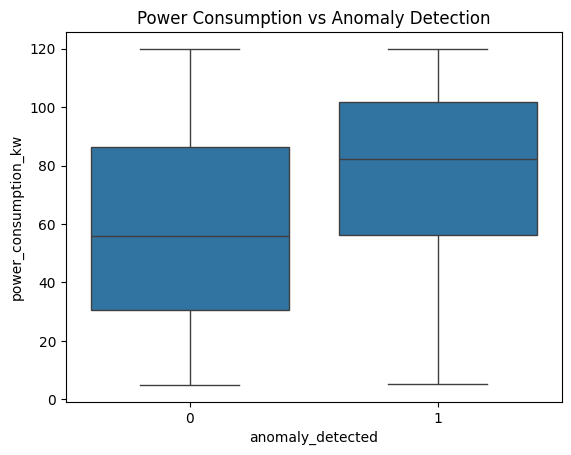

In [10]:
sns.boxplot(
    x="anomaly_detected",
    y="power_consumption_kw",
    data=data
)
plt.title("Power Consumption vs Anomaly Detection")
plt.show()

Systems flagged as anomalous tend to consume
higher levels of electrical power, indicating inefficiency.

Runtime & load vs anomaly (fatigue signals)

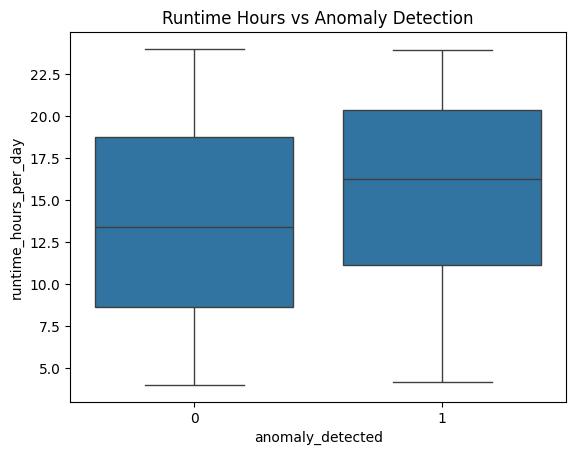

In [11]:
sns.boxplot(
    x="anomaly_detected",
    y="runtime_hours_per_day",
    data=data
)
plt.title("Runtime Hours vs Anomaly Detection")
plt.show()

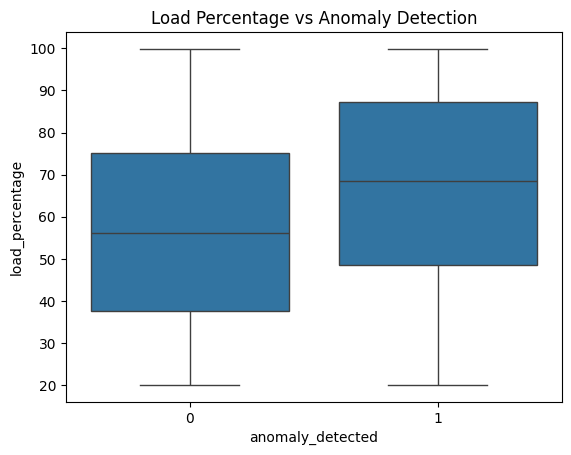

In [12]:
sns.boxplot(
    x="anomaly_detected",
    y="load_percentage",
    data=data
)
plt.title("Load Percentage vs Anomaly Detection")
plt.show()

Longer runtimes and higher load percentages
are associated with increased anomaly occurrence,
highlighting equipment stress and fatigue effects.

Alarms & maintenance gap

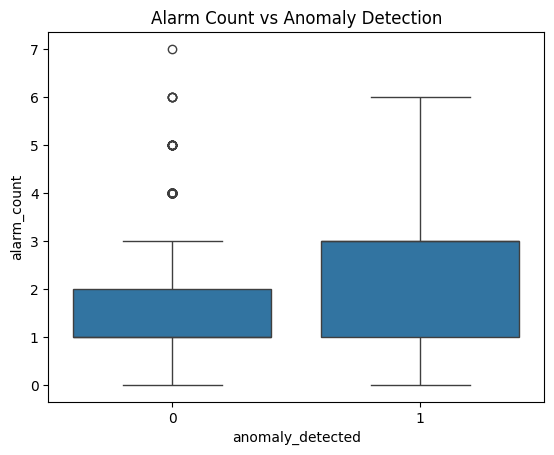

In [13]:
sns.boxplot(
    x="anomaly_detected",
    y="alarm_count",
    data=data
)
plt.title("Alarm Count vs Anomaly Detection")
plt.show()

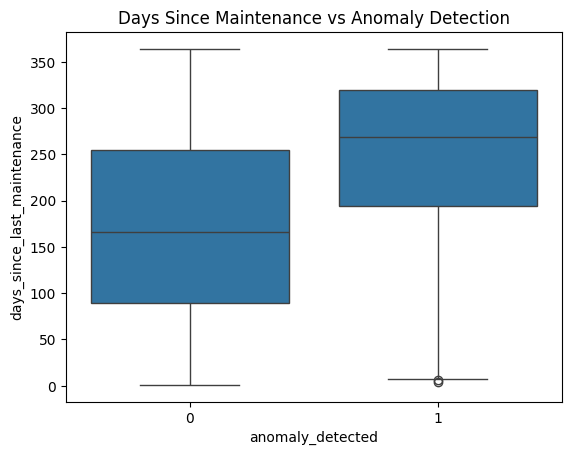

In [14]:
sns.boxplot(
    x="anomaly_detected",
    y="days_since_last_maintenance",
    data=data
)
plt.title("Days Since Maintenance vs Anomaly Detection")
plt.show()

Anomalous behavior correlates with higher alarm frequency
and longer intervals since last maintenance,
indicating degradation over time.

Failure risk score vs anomaly

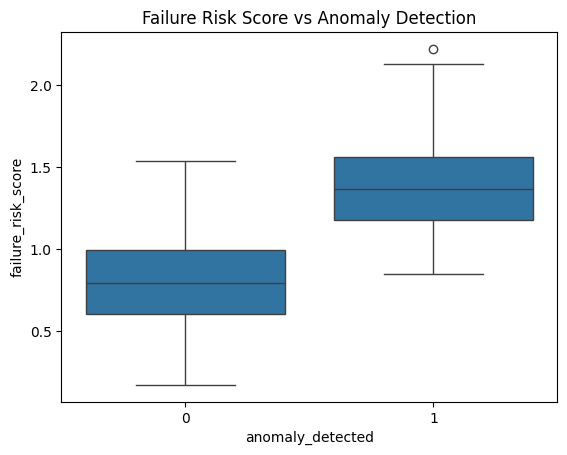

In [15]:
sns.boxplot(
    x="anomaly_detected",
    y="failure_risk_score",
    data=data
)
plt.title("Failure Risk Score vs Anomaly Detection")
plt.show()

Systems flagged as anomalous show higher failure risk scores,
validating the relationship between anomalies and failure likelihood.

## EDA Insights Summary

- Elevated temperature and power consumption are strong indicators of anomalies.
- Longer runtimes and higher load levels increase system stress.
- Frequent alarms and delayed maintenance correlate with higher failure risk.
- Anomaly detection provides early warning before equipment failure occurs.

## Modeling Strategy

The objective of modeling is to provide early warning signals
for abnormal system behavior and elevated failure risk.

Two modeling tasks are addressed:
1. Classification to detect anomalous system behavior
2. Regression to estimate relative equipment failure risk

Simple and interpretable models are chosen to ensure
trust, transparency, and ease of adoption in BMS / SCADA environments.

Prepare Features & Targets

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
X = data.drop(columns=["anomaly_detected", "failure_risk_score"])
y_anomaly = data["anomaly_detected"]
y_risk = data["failure_risk_score"]

Identify Categorical vs Numerical Features

In [18]:
categorical_features = [
    "equipment_type"
]

numerical_features = [
    "avg_temperature_c",
    "power_consumption_kw",
    "runtime_hours_per_day",
    "load_percentage",
    "alarm_count",
    "days_since_last_maintenance"
]

Preprocessing Pipeline

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("num", "passthrough", numerical_features)
    ]
)

Train–Test Split

In [20]:
X_train, X_test, y_train_anomaly, y_test_anomaly = train_test_split(
    X, y_anomaly, test_size=0.2, random_state=42, stratify=y_anomaly
)

_, _, y_train_risk, y_test_risk = train_test_split(
    X, y_risk, test_size=0.2, random_state=42
)

Model 1: Anomaly Detection (Classification)

In [21]:
from sklearn.linear_model import LogisticRegression

anomaly_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

anomaly_model.fit(X_train, y_train_anomaly)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['equipment_type']),
                                                 ('num', 'passthrough',
                                                  ['avg_temperature_c',
                                                   'power_consumption_kw',
                                                   'runtime_hours_per_day',
                                                   'load_percentage',
                                                   'alarm_count',
                                                   'days_since_last_maintenance'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

Model 2: Failure Risk Estimation (Regression)

In [22]:
from sklearn.linear_model import LinearRegression

risk_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

risk_model.fit(X_train, y_train_risk)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['equipment_type']),
                                                 ('num', 'passthrough',
                                                  ['avg_temperature_c',
                                                   'power_consumption_kw',
                                                   'runtime_hours_per_day',
                                                   'load_percentage',
                                                   'alarm_count',
                                                   'days_since_last_maintenance'])])),
                ('regressor', LinearRegression())])

Separating anomaly detection from failure risk estimation
reflects real-world maintenance workflows.

This enables teams to:
- Detect early abnormal behavior
- Prioritize maintenance actions
- Allocate resources based on relative risk

Evaluate Anomaly Detection Model (Classification)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_anomaly = anomaly_model.predict(X_test)

print(classification_report(y_test_anomaly, y_pred_anomaly))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       306
           1       0.76      0.63      0.69        54

    accuracy                           0.91       360
   macro avg       0.85      0.80      0.82       360
weighted avg       0.91      0.91      0.91       360



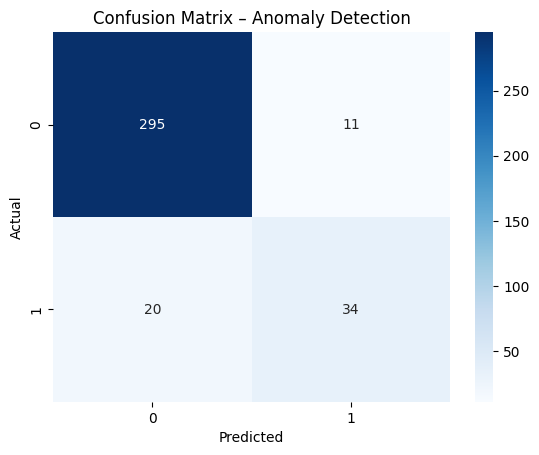

In [24]:
cm = confusion_matrix(y_test_anomaly, y_pred_anomaly)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – Anomaly Detection")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The anomaly detection model demonstrates reasonable performance
given the simplified and synthetic nature of the dataset.

In BMS / SCADA environments, missing an actual anomaly (false negative)
is often more costly than flagging a normal condition unnecessarily,
as undetected issues can escalate into equipment failure.

Evaluate Failure Risk Estimation Model (Regression)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred_risk = risk_model.predict(X_test)

mae = mean_absolute_error(y_test_risk, y_pred_risk)
rmse = np.sqrt(mean_squared_error(y_test_risk, y_pred_risk))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 0.28
RMSE: 0.35


The failure risk estimation model captures the general relationship
between operational conditions and equipment risk.

In real-world maintenance planning, relative risk ranking
is often more valuable than precise failure probability estimates.

## Operational Reflection

Simple and interpretable models were intentionally selected
to ensure trust and usability by maintenance teams.

In BMS / SCADA environments:
- Engineers need clear warning signals
- Maintenance actions must be justified and auditable
- Human expertise remains central to decision-making

Machine learning is used to augment, not replace,
preventive maintenance practices.

## Limitations & Ethical Considerations

- The dataset used is synthetic and based on assumed system behavior.
- Real-world BMS / SCADA systems may exhibit sensor noise,
  communication delays, and unexpected operational patterns.
- Model outputs should not be used as the sole basis
  for maintenance or safety decisions.

Human oversight and engineering judgment remain essential,
especially in safety- and reliability-critical environments.

## Conclusion

This project demonstrates how machine learning can be applied
responsibly to BMS / SCADA anomaly detection and failure risk estimation.

By focusing on interpretability, operational relevance,
and early warning signals, the project highlights the role of ML
in supporting preventive maintenance and energy-efficient operations.